In [1]:
# !python -m pip install fastai # run this one if you don't have fastai installed
# !python -m fastai.utils.show_install
from fastai.utils import *
show_install()



```text
=== Software === 
python       : 3.6.9
fastai       : 1.0.60
fastprogress : 0.2.3
torch        : 1.4.0
torch cuda   : 10.1 / is **Not available** 

=== Hardware === 
No GPUs available 

=== Environment === 
platform     : Linux-4.15.0-91-generic-x86_64-with-debian-buster-sid
distro       : #92-Ubuntu SMP Fri Feb 28 11:09:48 UTC 2020
conda env    : Unknown
python       : /home/justin/.pyenv/versions/3.6.9/bin/python3
sys.path     : 
/home/justin/swc_2020/swc_ws/devel/lib/python2.7/dist-packages
/opt/ros/melodic/lib/python2.7/dist-packages
/home/justin/.pyenv/versions/3.6.9/lib/python36.zip
/home/justin/.pyenv/versions/3.6.9/lib/python3.6
/home/justin/.pyenv/versions/3.6.9/lib/python3.6/lib-dynload
/home/justin/.local/lib/python3.6/site-packages
/home/justin/.pyenv/versions/3.6.9/lib/python3.6/site-packages
/home/justin/.pyenv/versions/3.6.9/lib/python3.6/site-packages/IPython/extensions
/home/justin/.ipython
no supported gpus found on this system
```

Please make sure to inclu

In [2]:
!which python
from fastai import *
from fastai.vision import *

def softmax(x):
    e=np.exp(x)
    return e/np.sum(e,axis=0)

def cross_entropy_loss(yc,y):
    return -np.sum(yc*np.log(y))
    
def return_drelu(dL,x): # y=max(x,0)
    dx=np.zeros_like(x)
    dx[x>0]=dL[x>0]
    return dx


/home/justin/.pyenv/versions/3.6.9/bin/python


In [3]:
# please complete the following functions, they should return gradient for a linear layer, note that x is input
# as a batch, each column is one sample

def return_dW(dL,W,x): # say y = W x, compute dL/dW given x and dL/dy (=dL), make sure you can handle batch
    fan_out, fan_in = W.shape
    batch_size=x.shape[1]
    
    dW = dL.dot(x.transpose())
    return dW

def return_dx(dL,W,x):
    fan_out, fan_in = W.shape
    batch_size=x.shape[1]
    
    dx = W.transpose().dot(dL)
    return dx


ImageDataBunch;

Train: LabelList (709 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
7,7,7,7,7
Path: /home/justin/.fastai/data/mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
7,7,7,7,7
Path: /home/justin/.fastai/data/mnist_tiny;

Test: LabelList (20 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: /home/justin/.fastai/data/mnist_tiny

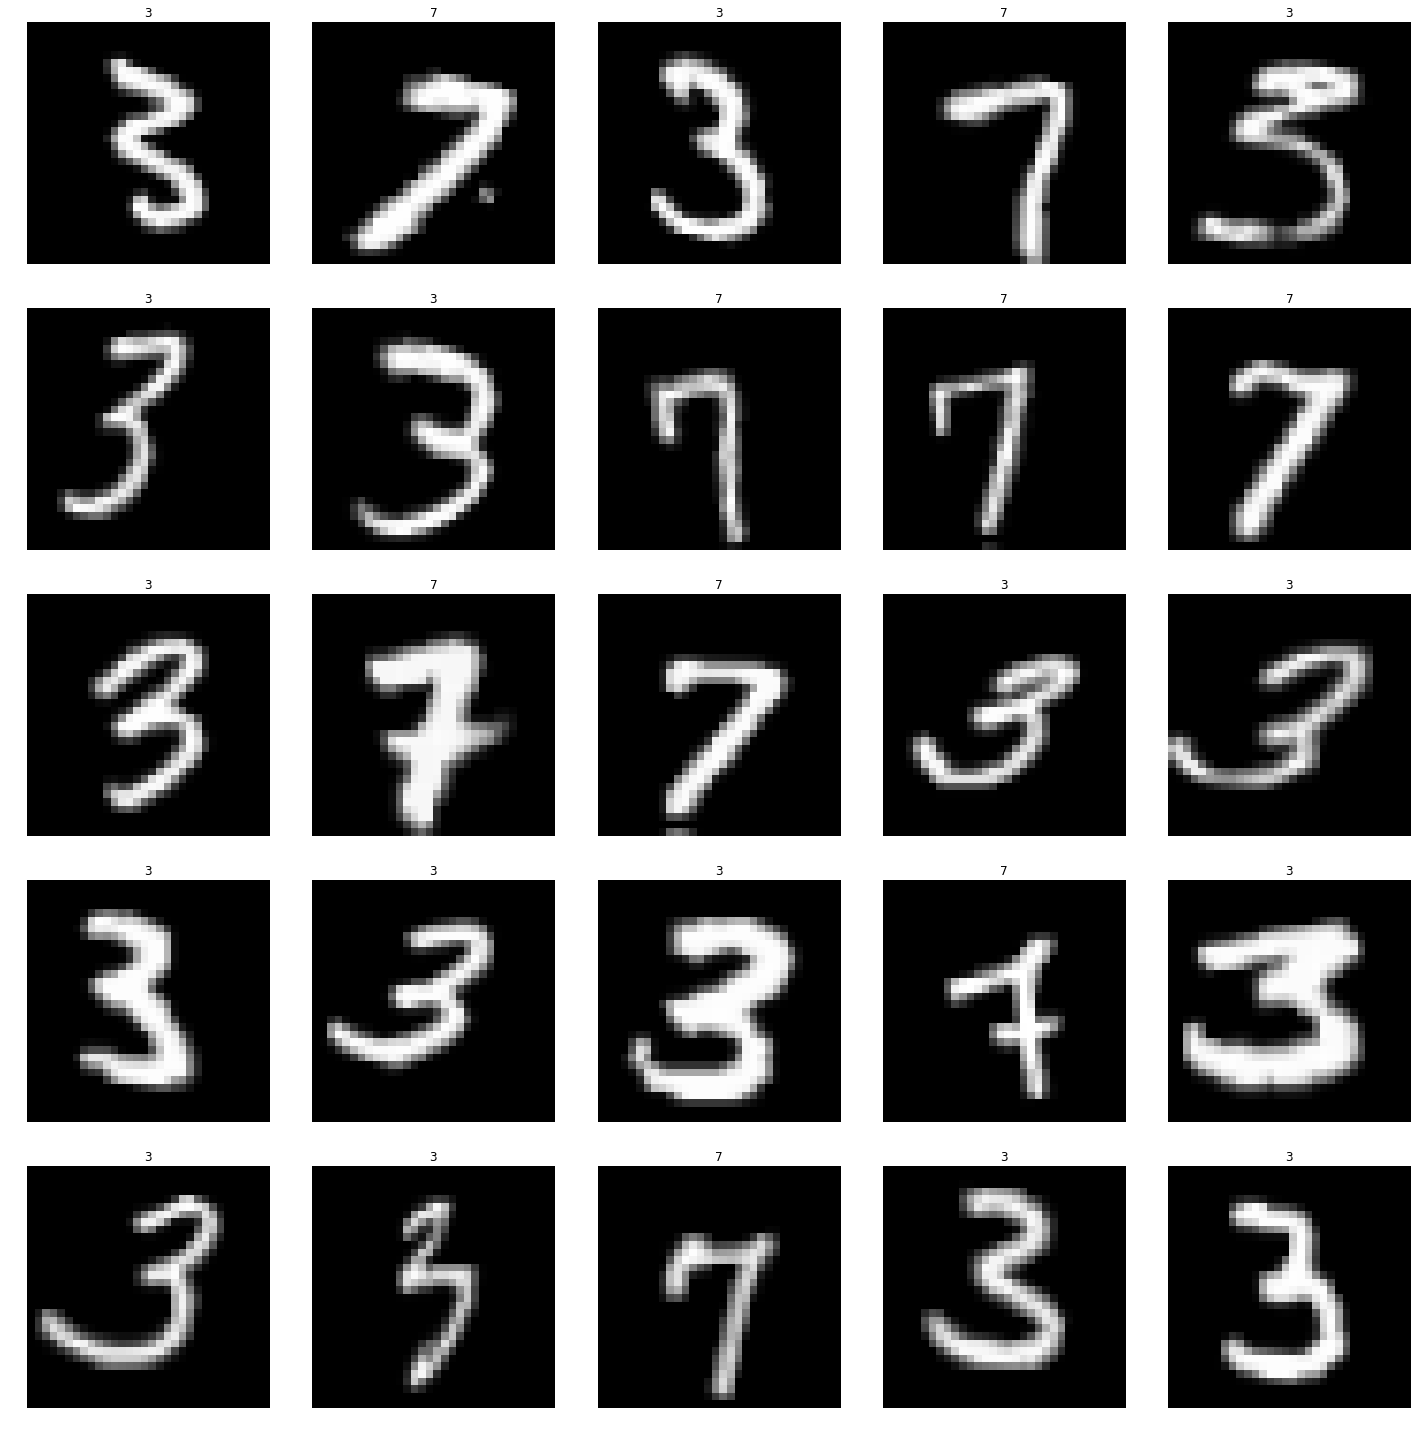

In [4]:
mnist=untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)


data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .add_test_folder(f'{mnist}' +'/test/')
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))


data.show_batch()
data

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import torch

# read a batch
batch=data.one_batch()
# batch=my_batch()

# get image dimensions
batch_size,no_channels,dimx,dimy=batch[0].shape
Nx=dimx*dimy+1
print(batch_size, no_channels, dimx, dimy, Nx)

# initialize parameters
learning_rate=0.0005
N1=200 # number of neurons in first hidden layer
N2=150 # number of neurons in second hidden layer

W1=np.random.randn(N1,Nx)/np.sqrt(Nx/2) # Xavier initialization
W2=np.random.randn(2,N1)/np.sqrt(N1/2)


for it in range(50):
    # reformat batch
    x=np.array(batch[0])
    x=x[:,0,:,:] # just take the first color (grayscale image anyway)
    x=np.reshape(x,(x.shape[0],-1)).transpose()
    x=np.concatenate((x,np.ones((1,64))))
    label=np.array(batch[1])
    yc=np.zeros((2,len(label)))
    yc[label,range(len(label))]=1

    # forward pass
    z1=W1 @ x
    y1=np.maximum(0,z1) # relu
    z2=W2 @ y1
    y=softmax(z2)

    # compute gradient
    dz2=y-yc

    dW2=return_dW(dz2,W2,y1)
    dy1=return_dx(dz2,W2,y1)
    
    dz1=return_drelu(dy1,z1)
    
    dW1=return_dW(dz1,W1,x)

    # gradient descent
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2

    # print cost and training error rate
    print('Cost: %s, Error rate: %s' % (cross_entropy_loss(yc,y),sum(np.abs((y[0]>0.5).astype(np.int)-yc[0]))/batch_size))
    batch=data.one_batch()



64 3 32 32 1025
Cost: 47.272152337803966, Error rate: 0.546875
Cost: 40.58511769989667, Error rate: 0.359375
Cost: 38.18508595465718, Error rate: 0.265625
Cost: 33.858800298131655, Error rate: 0.203125
Cost: 29.065162718338687, Error rate: 0.140625
Cost: 29.158569734434916, Error rate: 0.15625
Cost: 25.94706345590336, Error rate: 0.109375
Cost: 23.70052389705429, Error rate: 0.109375
Cost: 24.75811117713249, Error rate: 0.09375
Cost: 24.506315592140936, Error rate: 0.15625
Cost: 21.347865431598223, Error rate: 0.078125
Cost: 19.566224013987284, Error rate: 0.015625
Cost: 23.432409189424675, Error rate: 0.078125
Cost: 22.249034703803126, Error rate: 0.125
Cost: 22.74484320639421, Error rate: 0.109375
Cost: 23.16146066301835, Error rate: 0.140625
Cost: 17.175166776219072, Error rate: 0.078125
Cost: 18.7606123722268, Error rate: 0.078125
Cost: 25.09465306022315, Error rate: 0.171875
Cost: 17.851484472231142, Error rate: 0.0625
Cost: 21.38598248461167, Error rate: 0.078125
Cost: 14.9797604

In [15]:
# Run on the validation data
test_batch = data.one_batch(DatasetType.Valid)

# reformat batch
x=np.array(test_batch[0])
x=x[:,0,:,:] # just take the first color (grayscale image anyway)
x=np.reshape(x,(x.shape[0],-1)).transpose()
x=np.concatenate((x,np.ones((1,64))))
label=np.array(test_batch[1])
yc=np.zeros((2,len(label)))
yc[label,range(len(label))]=1

# forward pass
z1=W1 @ x
y1=np.maximum(0,z1) # relu
z2=W2 @ y1
y=softmax(z2)

print('Cost: %s, Error rate: %s' % (cross_entropy_loss(yc,y),sum(np.abs((y[0]>0.5).astype(np.int)-yc[0]))/batch_size))

Cost: 4.566867350663692, Error rate: 0.015625
